In [1]:
%matplotlib inline

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
# By Alexandra Lee (July 2018) 
#
# Calculate error between reconstructed vs observed gene expression
#-------------------------------------------------------------------------------------------------------------------------------
import os
import pandas as pd
import numpy as np
import seaborn as sns
np.random.seed(123)

In [3]:
# load arguments
estimated_file = os.path.join(os.path.dirname(os.getcwd()), "output", "estimated_test_control_latent.txt")
obsv_file = os.path.join(os.path.dirname(os.getcwd()), "data", "test_treat.txt")

# If using latent space estimation
latent = True

# output
fig_file = os.path.join(os.path.dirname(os.getcwd()), "viz", "estimated_sample0_latent.png")

In [4]:
# read in data
estimated_data = pd.read_table(estimated_file, header = 0, sep = '\t', index_col = 0)
obsv_data = pd.read_table(obsv_file, header = 0, sep = '\t', index_col = 0)

if latent:
    estimated_data.columns = obsv_data.columns

#obsv_data.head(5)
#estimated_data.head(5)

In [5]:
# Average gene expression across samples
estimated_data_mean = estimated_data.mean(axis=0)
obsv_data_mean = obsv_data.mean(axis=0)

#estimated_data_mean_df = pd.DataFrame(estimated_data_mean, index = estimated_data_mean.index, columns=['estimated'])
#obsv_data_mean_df = pd.DataFrame(obsv_data_mean, index = obsv_data_mean.index, columns = ['observed'])

# Try using single sample
estimated_data_mean_df = pd.DataFrame(estimated_data.iloc[0].transpose())
obsv_data_mean_df = pd.DataFrame(obsv_data.iloc[0].transpose())
estimated_data_mean_df.columns = ['estimated']
obsv_data_mean_df.columns = ['observed']

estimated_data_mean_df.head(5)
#obsv_data_mean_df.head(5)

,estimated
PA0001,0.323517
PA0002,0.309373
PA0003,0.309864
PA0004,0.405708
PA0005,0.271572


In [6]:
# Join 
X = pd.merge(estimated_data_mean_df, obsv_data_mean_df, left_index=True, right_index=True)
X.head(5)

,estimated,observed
PA0001,0.323517,0.624181
PA0002,0.309373,0.691115
PA0003,0.309864,0.474124
PA0004,0.405708,1.000000
PA0005,0.271572,0.225334


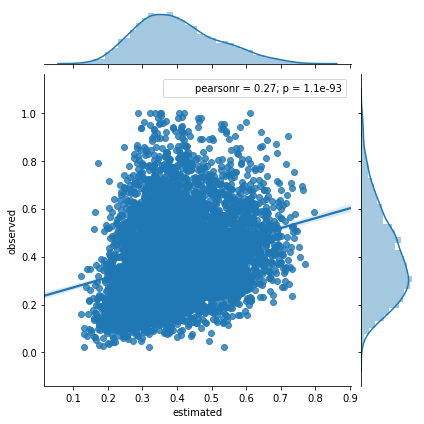

In [7]:
# Plot
fg=sns.jointplot(x='estimated', y='observed', data=X, kind='reg');

#fg = sns.lmplot(x = 'estimated', y = 'observed', data = X)
fg.savefig(fig_file)

In [8]:
# Calculate error: RMSE of estimated data and observed data per sample

# Note: estiamted and observed samples are not matched, so how do we compare them?
#rmse = np.ndarray(shape=(1, estimated_data.shape[1]))
#i = 0
#for col in estimated_data.columns:
#    rmse[0,i] = ((estimated_data[col] - obsv_data[col]) ** 2).mean() ** .5
#    i+=1
#rmse